# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset?resource=download

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

df_reviews=pd.read_csv('reviews.csv')
df=pd.read_csv('products.csv')
df


,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
...,...,...,...,...,...,...,...,...
236,breyers,64_breyers,CINNABON®,NaN,Calling all cinnamon roll lovers! We teamed up...,4.0,28,"MILK, CORN SYRUP, SUGAR, BROWN SUGAR, SOYBEAN ..."
237,breyers,65_breyers,CarbSmart™ Caramel Swirl Bar,NaN,Watching your grams of sugar or carbs? Try our...,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
238,breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
239,breyers,67_breyers,Layered Dessert Peach Cobbler,NaN,Love peach cobbler topped with Breyers®? Then ...,3.2,38,"MILK, CORN SYRUP, ENRICHED WHEAT FLOUR, WHEAT ..."


In [5]:
print(df.shape)


(241, 8)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         241 non-null    object 
 1   key           241 non-null    object 
 2   name          241 non-null    object 
 3   subhead       57 non-null     object 
 4   description   237 non-null    object 
 5   rating        241 non-null    float64
 6   rating_count  241 non-null    int64  
 7   ingredients   241 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.2+ KB


In [7]:
df.describe()

,rating,rating_count
count,241.000000,241.000000
mean,4.223237,90.016598
std,0.620383,111.349449
min,1.200000,2.000000
25%,4.000000,28.000000
50%,4.400000,59.000000
75%,4.700000,112.000000
max,5.000000,983.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

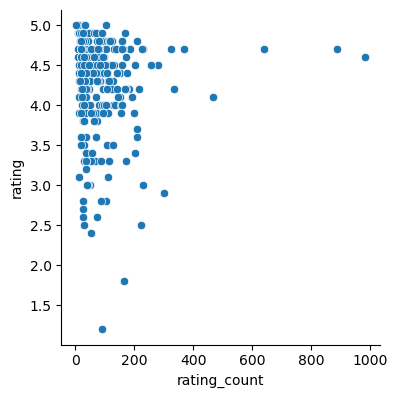

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

# pairplot to visualize the data for correlation
sns.pairplot(df, x_vars=['rating_count'], 
             y_vars='rating', size=4, aspect=1, kind='scatter')
plt.show()

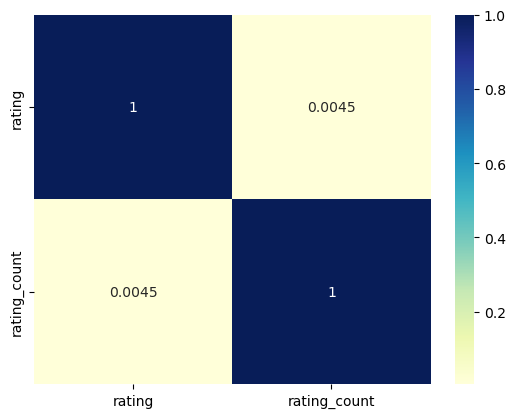

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [14]:

X = df['rating_count']
y = df['rating']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [17]:
X_train
y_train

223    2.4
210    2.6
88     5.0
191    4.1
195    2.8
      ... 
87     4.2
103    3.8
67     2.6
24     2.9
8      4.3
Name: rating, Length: 168, dtype: float64

In [18]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [19]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const           4.183750
rating_count    0.000338
dtype: float64

In [20]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7984
Date:                Fri, 13 Oct 2023   Prob (F-statistic):              0.373
Time:                        17:26:47   Log-Likelihood:                -157.51
No. Observations:                 168   AIC:                             319.0
Df Residuals:                     166   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1837      0.061     68.715      0.000       4.064       4.304
rating_count     0.0003      0.000      0.894      0.373      -0.000       0.001
==============================================================================
Omnibus:                       40.713   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.500
Skew:                          -1.314   Prob(JB):                     2.68e-14
Kurtosis:                       4.423   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

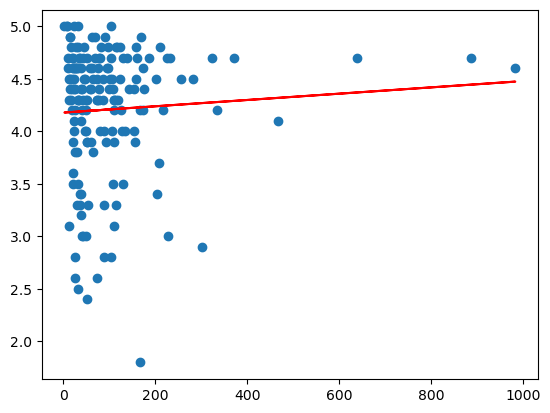

In [25]:
plt.scatter(X_train, y_train)
# to get simple linear regression line ,equation is y = c + mX       
plt.plot(X_train, 4.18 + 0.0003*X_train, 'r')
plt.show()

In [ ]:
#We have to make sure that the p-value should always be less for the coefficient to be significant
#p value is close to 0

## Error Terms

Finally, plot your error terms!

In [23]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

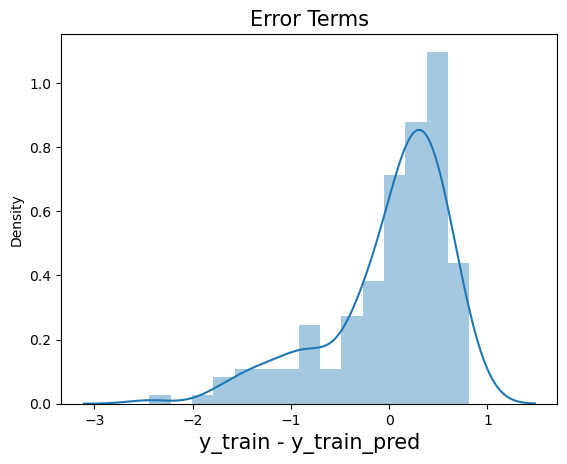

In [24]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

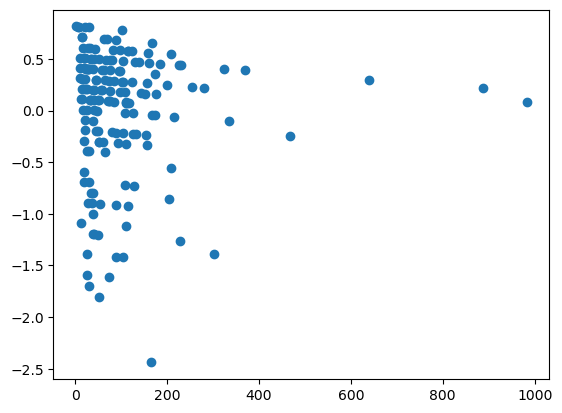

In [30]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?   0.005
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?
It was not particularly effective in this case.  The error terms are non-normally distributed, suggests that there are a few unusual data points that must be studied closely to make a better model.
3. Was your plot of the error terms a bell curve? Yes ,left skewed one